# Titanic Disaster

In this reboot, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

❓ Start loading `matplotlib`, `numpy` and `pandas` the usual way

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

❓ Run `!ls -lh` to list files in the current folder. You should see a `.csv` file.

In [2]:
!ls -lh

total 96K
-rwxrwxr-x 1 thomas thomas  60K Apr 22  2021 ML_Titanic_dataset.csv
-rw-rw-r-- 1 thomas thomas 1.9K Mar 29  2022 README.md
drwxrwxr-x 3 thomas thomas 4.0K Oct 15 17:47 solution_02-Data-Toolkit_01-Data-Analysis_Recap
-rw-rw-r-- 1 thomas thomas 8.2K Mar 29  2022 titanic_disaster.ipynb
-rw-rw-r-- 1 thomas thomas  14K Oct 15 18:06 titanic_disaster-my.ipynb


❓ Load the CSV data as a into a `titanic_df` variable.

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [3]:
titanic_df = pd.read_csv('ML_Titanic_dataset.csv')

❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

❓ Use the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function to get rid of the `Cabin` in `titanic_df`

In [5]:
titanic_df.drop(columns=["Cabin"], inplace=True)

In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Classes Analysis

Let's have a look at the ticket divide.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [7]:
pclass_df = titanic_df.groupby('Pclass')[['Name']].count()
pclass_df

,Name
Pclass,
1,216
2,184
3,491


Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built in the previous question as a barchart

<AxesSubplot: xlabel='Pclass'>

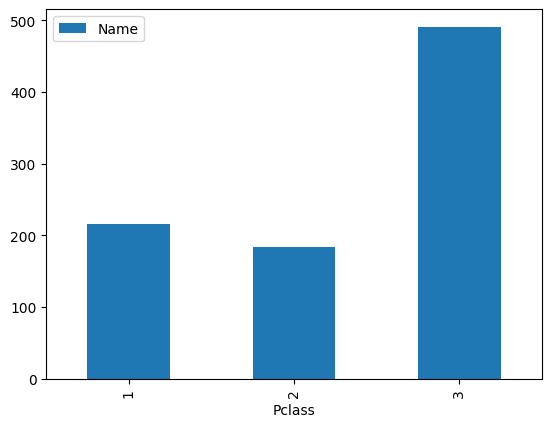

In [8]:
pclass_df.plot(kind="bar")

Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

<AxesSubplot: xlabel='Pclass'>

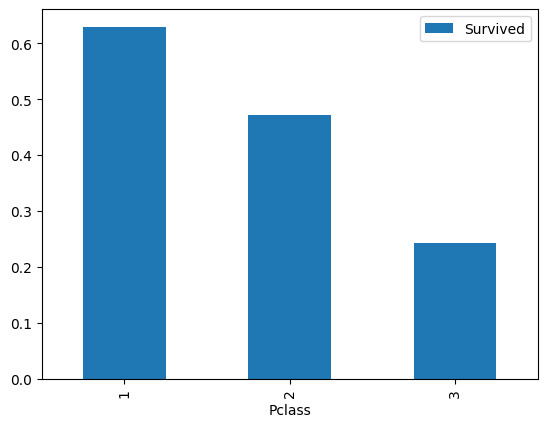

In [9]:
titanic_df.groupby("Pclass")[["Survived"]].mean().plot(kind="bar")

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [10]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

❓ Plot a barchart of survival frequency of each gender. Who survived the most?

<AxesSubplot: xlabel='Sex'>

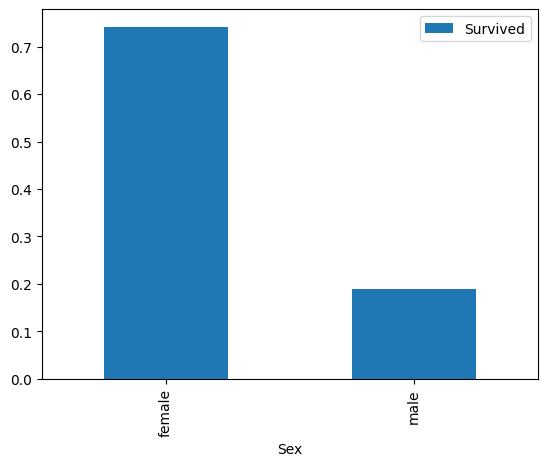

In [11]:
titanic_df.groupby('Sex')[["Survived"]].mean().plot(kind="bar")

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

In [12]:
titanic_df.groupby('Sex')[["Survived"]].sum()

,Survived
Sex,
female,233
male,109


In [13]:
titanic_df.groupby('Sex')[["Survived"]].count()

,Survived
Sex,
female,314
male,577


In [14]:
survivors_df = titanic_df.groupby('Sex')[["Survived"]].sum()
survivors_df['Total'] = titanic_df.groupby('Sex')[["Survived"]].count()
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577


<AxesSubplot: xlabel='Sex'>

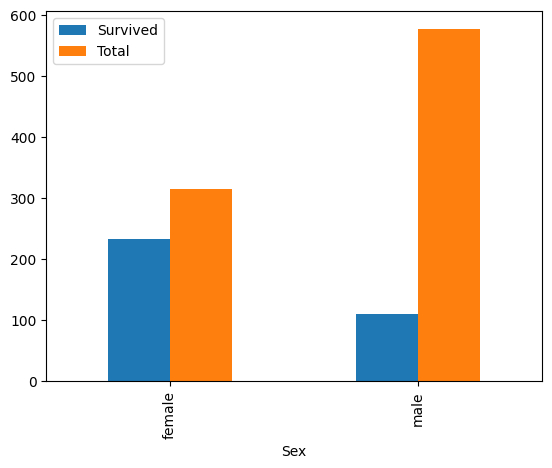

In [15]:
survivors_df.plot(kind="bar")

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [17]:
children_df = titanic_df[titanic_df['Age']<=18]

❓ How many children were there in the Titanic?

In [18]:
children_df.shape[0]

139

❓ How many children survived?

In [19]:
children_survived = children_df['Survived'].sum()
children_survived

70

❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [20]:
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577


In [21]:
children_survivors_df = children_df.groupby('Sex')[['Survived']].sum()
children_survivors_df['Total'] = children_df.groupby('Sex')[['Survived']].count()
children_survivors_df

,Survived,Total
Sex,,
female,46,68
male,24,71


In [23]:
survivors_all = survivors_df - children_survivors_df
survivors_all.loc['children'] = (children_survived, children_df.shape[0])
survivors_all

,Survived,Total
Sex,,
female,187,246
male,85,506
children,70,139


<AxesSubplot: xlabel='Sex'>

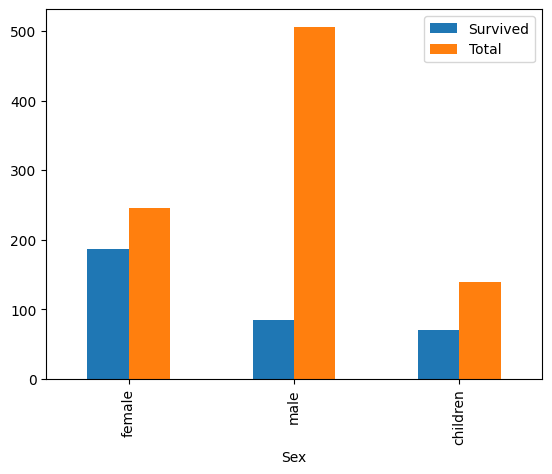

In [24]:
survivors_all.plot(kind="bar")

## Big families

❓ Find out if it was harder for bigger families to survive?
  
Here you create a new column in your `DataFrame` for the family size of the passenger.

<AxesSubplot: xlabel='family_size'>

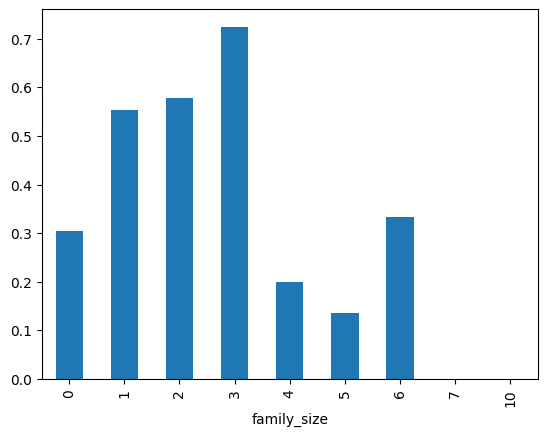

In [28]:
titanic_df['family_size'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.groupby('family_size')['Survived'].mean().plot(kind='bar')

## Distinguished titles

#### ❓ Were passengers with distinguished titles preferred during the evacuation?
   
With some string manipulation, create a new column for each user with their title

In [48]:
my_name =  "Braund, Mr. Owen Harris"
def get_title(name):
    return name.split(',')[1].split('.')[0][1:]
get_title(my_name)

'Mr'

In [50]:
titanic_df['Title'] = titanic_df['Name'].apply(get_title)

<AxesSubplot: xlabel='Title'>

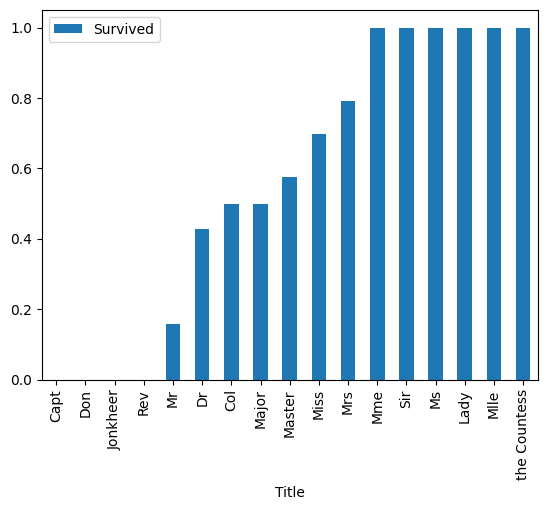

In [59]:
titanic_df.groupby('Title')[['Survived']].mean().sort_values('Survived').plot(kind="bar")